## Описание проекта

### Общая информация о проекте.

**О компании:**  Клиентами «Нупозвони» являются организации, которым нужно распределять множество входящих вызовов на различных операторов, либо осуществлять исходящие вызовы силами операторов. Также операторы могут осуществлять внутренние вызовы, то есть вызовы друг между другом, которые осуществляются внутри сети виртуальной телефонии.

**Заказчик:** гениральный деректор «Нупозвони»

**Первоначальный запрос:** поиск клиентов, которые переплачивают, анализ влияния изменений на выручку.

**Цель проекта:** выявление активных клиентов за последние 3 месяца, использующих неэффективный тариф с целью сохранения лояльности клиента, и провести анализ изменения выручки компании при пререводе клиентов на оптимальные тарифы.

Для достижения поставленной цели требуется выполнение следующих **задач**: 
* определние критерия активности клиента
* расчет всех возможных вариантов по каждому тарифу по всем клиентам
* расчет текущей выручки и предполагаемая выручка после внесения изменений

Анализ проводится 3 раз в месяца. 
Рассматриваемый период сентябрь - ноябрь (ноябрь считаем полным месяцем)

### Тарифная сетка
В Телекоме действуют следующие тарифные планы:

|   Тарифный план    |     Ежемесячная плата    |     Входящие    |     Исходящие звонки* внутри сети**|     Лимит внут. исх    |     Исходящие   звонки*, кроме внутренних    | Плата за 1 оператора |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|     А    |     4 000 ₽    |     0    |     0.10 ₽/мин.    |     2000    |     0.3 ₽/мин.    | 50 ₽/оператор |
|     В    |     2 000 ₽    |     0    |     0.15 ₽/мин.    |     500     |     0.5 ₽/мин.    | 150 ₽/оператор |
|     С    |     1 000 ₽    |     0    |     0.30 ₽/мин.    |     0       |     0.7 ₽/мин.    | 300 ₽/оператор |

\* исходящие звонки с учетом времени ожидания; <br>
\** на некоторых тарифах на исходящие звонки внутри сети существует бесплатный лимит в определенное количество минут (см. тарифный план); 
цена приведена на расход свыше установленного лимита.

Расходы клиента состоят из:
1. ежемесячной платы +
2. платы за перерасход по внутренним исходящим звонкам, с учетом времени ожидания (`total_call_duration`) +
3. платы за внешние исходящие звонки, с учетом времени ожидания (`total_call_duration`) +
4. платы оператора

### Привила выставления счета

Счета выставляются за прошедший календарный месяц, поэтому датой списания можно считать 1-е число каждого месяца. Остаток внутреннего исходящего трафика сгорает на начало месяца. 

Тарификация происходит на основе кумулятивных показателей за период расчета (календарный месяц). Общая продолжительность звонков (в минутах) за день по каждому оператору округляется в большую сторону. 

### План исследования 

**Данное исследование разделим на несколько частей.**

***Часть 1. Изучение общей информации и подготовка данных:***
* [1. Получение общей информации, загрузка библиотек.](#1-bullet) 
* [2. Изучение telecom_clients.](#2-bullet)
* [3. Изучение telecom_dataset.](#3-bullet)
* [4. Приведение данных  к нужным типам.](#4-bullet)
* [5. Нахождение и ликвидация пропусков.](#4-bullet)
* [6. Нахождение и ликвидация дубликатов.](#5-bullet)
* [7. Нахождение и ликвидация аномалий.](#7-bullet)



**Часть 2. Исследовательская часть:**
* [1. Определение активных клиентов.](#8-bullet)
* [2. Проверка гипотезы "Активные клиенты говорят больше, чем неактивные".](#9-bullet)
* [3. Изучение потребительского поведения неактивных и активных клиентов.](#10-bullet)
* [4. Поиск активных клиентов, использующих неэффективный тариф.](#11-bullet)
* [5. Расчет текущей выручки и выручки после оптимизации тарифов.](#12-bullet)
* [6. Проверка гипотезы "Средние затраты киентов не изменились после оптимизации".](#13-bullet)


**Часть 3. Заключение и рекомендации:**
* [1. Выводы.](#14-bullet)
* [2. Рекомендации.](#15-bullet)
* [3. Ссылка на презентацию.](#16-bullet)
* [3. Ссылка на дашборд.](#17-bullet)



**Гипотеза 1**

    Н0 "Активные и неактивные пользователи говорят одинаково"

    Н1 "Время разговора у активных пользователей больше, чем у неактивных"


**Гипотеза 2**

    Н0 "Средние затраты пользователя на услуги компании до и после оптипизации не отличаются"

    Н1 "Средние затраты пользователя на услуги компании после оптипизации уменьшились"

## Часть 1. Изучение общей информации и подготовка данных:

### Получение общей информации, загрузка библиотек.

In [1]:
# выгружаем необходимые библиотеки
import pandas as pd
import datetime as dt
import plotly.express as px
import numpy as np
from scipy import stats as st
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
try: 
    telecom_clients = pd.read_csv('telecom_clients.csv')
    telecom_dataset = pd.read_csv('telecom_dataset.csv')
except:
    # удалено по правилам ЯП
td = telecom_dataset.copy()


### Изучение данных из telecom_dataset

**telecom_dataset**:
- `user_id` — идентификатор клиента;
- `date` — дата статистики;
- `direction` — направление вызовов: `out` — исходящий вызов, `in` — входящий;
- `internal` — маркер внутренних и внешних вызовов;
- `operator_id` — идентификатор оператора;
- `is_missed_call` — маркер пропущенных вызовов;
- `calls_count` — количество звонков;
- `call_duration` - длительность **всех звонков** без учёта времени ожидания;
- `total_call_duration` - длительность **всех звонков** с учётом времени ожидания.

In [3]:
telecom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [4]:
telecom_dataset.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [5]:
telecom_dataset.isna().mean()

user_id                0.000000
date                   0.000000
direction              0.000000
internal               0.002171
operator_id            0.151608
is_missed_call         0.000000
calls_count            0.000000
call_duration          0.000000
total_call_duration    0.000000
dtype: float64

In [6]:
telecom_dataset.duplicated().sum()

4900

In [7]:
telecom_dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [8]:
telecom_dataset['user_id'].nunique()

307

In [9]:
row_before = telecom_dataset.shape[0]

In [10]:
print(f'''Данные представлены с {telecom_dataset.date.min()} по {
telecom_dataset.date.max()} ''')

Данные представлены с 2019-08-02 00:00:00+03:00 по 2019-11-28 00:00:00+03:00 


Требуется изменение типов данных и заполнение пропусков,  а также очистка от дубликатов. Явных дубликатов 4900. 

### Изучение telecom_clients

**telecom_clients**:
- `user_id` — идентификатор клиента;
- `tariff_plan` — тарифный план клиента;
- `date_start` — дата регистрации клиента в сервисе.

In [11]:
telecom_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [12]:
telecom_clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [13]:
telecom_clients.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [14]:
print(f'''Данные представлены с {telecom_clients.date_start.min()} по {
telecom_clients.date_start.max()} ''')

Данные представлены с 2019-08-01 по 2019-10-31 


In [15]:
telecom_clients.tariff_plan.value_counts()

C    395
B    261
A     76
Name: tariff_plan, dtype: int64

In [16]:
telecom_clients.user_id.nunique()

732

In [17]:
telecom_clients.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

In [18]:
telecom_clients.duplicated().sum()

0

In [19]:
telecom_clients['user_id'].nunique()

732

Требуется привести дату в таблице telecom_clients к верному формату. Предположительно дубликатов нет. Пропуски отсутствуют.
Данные даны с 1 августа по 31 октября.

### Нахождение и ликвидация пропусков.

Для работы с данными вместо пропусков в столбце operator_id установим "заглушки". 

In [20]:
telecom_dataset[telecom_dataset['operator_id'].isna()]['is_missed_call'].value_counts()

True     8050
False     122
Name: is_missed_call, dtype: int64

Большинство пропусков связано с тем, что звонок не дошел до оператора. 

In [21]:
telecom_dataset[telecom_dataset['operator_id'].isna() & (telecom_dataset['is_missed_call'] == True)] = telecom_dataset[
    (telecom_dataset['operator_id'].isna()) & (telecom_dataset['is_missed_call'] == True)].fillna('0')

Оставшиеся пропуски удалим, т к их природу не отследить.

In [22]:
telecom_dataset[telecom_dataset['operator_id'].isna() & (telecom_dataset['is_missed_call'] == False)] = telecom_dataset[
    (telecom_dataset['operator_id'].isna()) & (telecom_dataset['is_missed_call'] == False)].dropna()

In [23]:
(telecom_dataset
 .query('internal != internal')
 .groupby(['is_missed_call','direction'])
 .agg({'user_id':'nunique','calls_count':'sum','total_call_duration':'sum'})
 .assign(calls_share = lambda x: x['calls_count'] / telecom_dataset.query('internal != internal').calls_count.sum(),
         total_calls_share = lambda x: x['calls_count'] / telecom_dataset.calls_count.sum())
)

,,user_id,calls_count,total_call_duration,calls_share,total_calls_share
is_missed_call,direction,,,,,
False,in,29,64.0,8166.0,0.984615,0.000072
True,in,1,1.0,136.0,0.015385,0.000001


Отследить природу пропусков в столбце "internal" не удалось. В связи с этим принято решении об удалении строк с пропущенными данными, они составляют менее 0.2% от всего датафрейма.

In [24]:
telecom_dataset.shape[0]

53902

In [25]:
telecom_dataset = telecom_dataset.dropna(subset=['internal'])

In [26]:
telecom_dataset.shape[0]

53720

In [27]:
telecom_dataset.isna().sum()

user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64

После обработки данных не рассмотренных пропусков не осталось.

Для анализа нам важны такие показатели как количество клиентов, количество операторов и исходящий трафик. Поэтому отследим изменение количества клиентов и операторов

In [28]:
# количество клиентов и операторов до фильтрации:

td[['user_id','operator_id']].nunique()

user_id         307
operator_id    1092
dtype: int64

In [29]:
# количество клиентов и операторов после фильтрации:
telecom_dataset[['user_id','operator_id']].nunique()

user_id         307
operator_id    1093
dtype: int64

In [30]:
# длительность исходящих до и после:
td.query('direction == "out"').total_call_duration.sum() - telecom_dataset.query('direction == "out"').total_call_duration.sum()

190573.0

Количество операторов увеличилось на заглушку, а также потеряли незначительную часть по секундам . Другие показатели не изменились.

### Приведение данных к нужным типам

Приведет к нужному типу столбцы с датами.

In [31]:
telecom_dataset.date = pd.to_datetime(telecom_dataset['date']).dt.date.astype('datetime64[ns]')

In [32]:
telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start']).dt.date.astype('datetime64[ns]')

In [33]:
telecom_dataset['operator_id'] = telecom_dataset['operator_id'].astype('int64')

In [34]:
telecom_dataset['user_id'] = telecom_dataset['user_id'].astype('int64')

In [35]:
telecom_dataset.dtypes

user_id                         int64
date                   datetime64[ns]
direction                      object
internal                       object
operator_id                     int64
is_missed_call                 object
calls_count                   float64
call_duration                 float64
total_call_duration           float64
dtype: object

In [36]:
telecom_clients.dtypes

user_id                 int64
tariff_plan            object
date_start     datetime64[ns]
dtype: object

Все типы приведены к нужным.

### Нахождение и ликвидация дубликатов.

#### Дубликаты в telecom_dataset

In [37]:
telecom_dataset.shape[0]

53720

In [38]:
telecom_dataset[
    ['user_id', 'date',  'direction', 'internal', 'operator_id', 'is_missed_call']
].duplicated().sum()

4886

In [39]:
telecom_dataset = telecom_dataset.drop_duplicates(ignore_index=True)

In [40]:
telecom_dataset.shape[0]

48834

In [41]:
telecom_dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,0,True,2.0,0.0,4.0
1,166377,2019-08-05,out,True,880022,True,3.0,0.0,5.0
2,166377,2019-08-05,out,True,880020,True,1.0,0.0,1.0
3,166377,2019-08-05,out,True,880020,False,1.0,10.0,18.0
4,166377,2019-08-05,out,False,880022,True,3.0,0.0,25.0


In [42]:
telecom_dataset[
    ['user_id', 'date',  'direction', 'internal', 'operator_id', 'is_missed_call']
].duplicated().sum()

0

In [43]:
group_td = telecom_dataset.pivot_table( 
    index = ['user_id', 'date', 'operator_id'], 
    values = ['call_duration', 'total_call_duration', 'calls_count'], 
    aggfunc = 'sum').reset_index()
group_td['total_call_duration_h']  = group_td['total_call_duration']/60/60
group_td['call_duration_h']  = group_td['call_duration']/60/60
group_td = group_td.query('operator_id != 0')
group_td[group_td['total_call_duration_h'] >24]

,user_id,date,operator_id,call_duration,calls_count,total_call_duration,total_call_duration_h,call_duration_h
3167,166582,2019-08-21,885890,68400.0,849.0,87794.0,24.387222,19.000000
3185,166582,2019-08-27,885890,63741.0,1077.0,89853.0,24.959167,17.705833
3191,166582,2019-08-29,885890,68467.0,1109.0,96824.0,26.895556,19.018611
3202,166582,2019-09-02,885876,91447.0,1510.0,126416.0,35.115556,25.401944
3205,166582,2019-09-03,885876,88710.0,1897.0,132757.0,36.876944,24.641667
3208,166582,2019-09-04,885876,94055.0,1374.0,126723.0,35.200833,26.126389
3211,166582,2019-09-05,885876,111307.0,1000.0,135635.0,37.676389,30.918611
3214,166582,2019-09-06,885876,89539.0,1008.0,114881.0,31.911389,24.871944
3223,166582,2019-09-09,885876,122521.0,1700.0,160826.0,44.673889,34.033611
3226,166582,2019-09-10,885876,81237.0,1788.0,122399.0,33.999722,22.565833


С клиентом 166582 произошел технический сбой и данные представлены некорректно. Пользователь будет удалён из данных.

In [44]:
more_24 = list(group_td[group_td['total_call_duration_h'] >24]['user_id'].unique())
more_24

[166582]

In [45]:
telecom_dataset = telecom_dataset[~telecom_dataset['user_id'].isin(more_24)]

In [46]:
telecom_clients = telecom_clients[~telecom_clients['user_id'].isin(more_24)]

In [47]:
group_td = group_td[group_td['user_id']!=166582]

In [48]:
telecom_dataset['user_id'].nunique()

306

#### Дубликаты в telecom_clients

Явные дубликаты отсутствуют.

In [49]:
telecom_clients[['user_id', 'tariff_plan']].duplicated().sum()

0

In [50]:
telecom_clients[['user_id', 'date_start']].duplicated().sum()

0

### Нахождение и ликвидация аномалий.

**telecom_dataset**:
- `user_id` — идентификатор клиента;
- `date` — дата статистики;
- `direction` — направление вызовов: `out` — исходящий вызов, `in` — входящий;
- `internal` — маркер внутренних и внешних вызовов;
- `operator_id` — идентификатор оператора;
- `is_missed_call` — маркер пропущенных вызовов;
- `calls_count` — количество звонков;
- `call_duration` - длительность **всех звонков** без учёта времени ожидания;
- `total_call_duration` - длительность **всех звонков** с учётом времени ожидания.

#### Поиск аномалий в calls_count

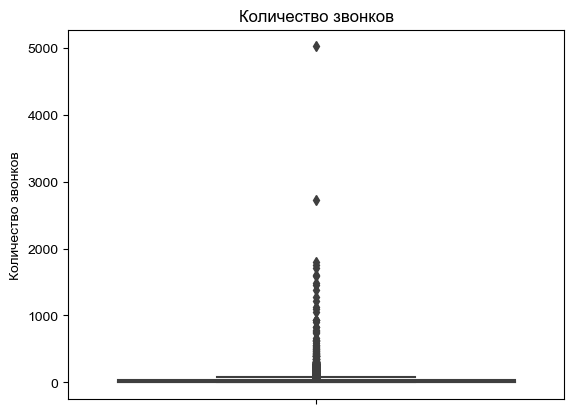

In [51]:
sns.boxplot(data=group_td, y="calls_count")
sns.set_style("whitegrid")
plt.title('Количество звонков')
plt.ylabel('Количество звонков')
plt.show() 

In [53]:
telecom_dataset[telecom_dataset['calls_count'] > 1000]['is_missed_call'].value_counts()

True    24
Name: is_missed_call, dtype: int64

In [54]:
group_td[group_td['calls_count'] > 2000]

,user_id,date,operator_id,call_duration,calls_count,total_call_duration,total_call_duration_h,call_duration_h
20427,167827,2019-10-31,929428,2644.0,2730.0,49759.0,13.821944,0.734444
20454,167827,2019-11-11,929428,9320.0,5022.0,18700.0,5.194444,2.588889


In [55]:
telecom_dataset[(telecom_dataset['operator_id'] == 929428) 
                & (telecom_dataset['date'] == '2019-11-11')]

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
36979,167827,2019-11-11,out,False,929428,False,205.0,9320.0,13171.0
36981,167827,2019-11-11,out,False,929428,True,4817.0,0.0,5529.0


Оператор 929428 2019-11-11 производил обзвон клиентов. 4817 клиентов не ответили на его звонок.
Оператор 929428 отработал 13 часов и совершил 2730 звонков. 

Аномальных значений не наблюдается. Далее изучим аномалии по длительности звонков.

#### Поиск аномалий в total_call_duration

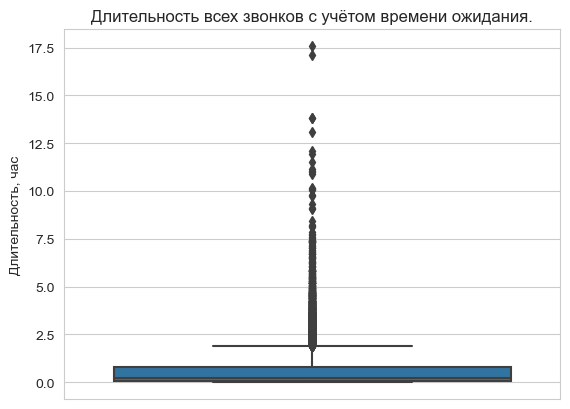

In [57]:
sns.boxplot( y="total_call_duration_h", data=group_td)
sns.set_style("whitegrid")
plt.title('Длительность всех звонков с учётом времени ожидания.')
plt.ylabel("Длительность, час")
plt.show()

Изучим случаи, когда время работы оператора за день превышает 12 часов.

In [58]:
more_12  = group_td[group_td['total_call_duration_h'] > 12].sort_values(by='total_call_duration_h').reset_index()
more_12

,index,user_id,date,operator_id,call_duration,calls_count,total_call_duration,total_call_duration_h,call_duration_h
0,15220,167285,2019-10-23,908640,25142.0,1602.0,43595.0,12.109722,6.983889
1,20431,167827,2019-11-01,929428,14584.0,1802.0,47098.0,13.082778,4.051111
2,15218,167285,2019-10-22,908640,26994.0,1748.0,49666.0,13.796111,7.498333
3,20427,167827,2019-10-31,929428,2644.0,2730.0,49759.0,13.821944,0.734444
4,25791,168361,2019-11-04,945278,11553.0,227.0,61611.0,17.114167,3.209167
5,20352,167827,2019-10-10,929424,41603.0,1491.0,63253.0,17.570278,11.556389


Всего 6 случаев, когда операторы работали более 12 часов в сутки, при этом они совершали более тысячи звонков. 2 раза операторы работали более 17 часов в сутки, что можно считать аномальными значениями. Однако их доля несуществена. поэтому оставляем.

## Часть 2. Исследовательская часть:

### Определение активных клиентов.

Требуется выделить категорию активных клиентов. Деление на активны и неактивных может рассматриваться с нескольких сторон:
* по времени разговора
* по количеству звонков 

В рамках нашего исследования будем определять клиентов по времени звонком с учётом ожидания.

In [59]:
telecom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48114 entries, 0 to 48833
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              48114 non-null  int64         
 1   date                 48114 non-null  datetime64[ns]
 2   direction            48114 non-null  object        
 3   internal             48114 non-null  object        
 4   operator_id          48114 non-null  int64         
 5   is_missed_call       48114 non-null  object        
 6   calls_count          48114 non-null  float64       
 7   call_duration        48114 non-null  float64       
 8   total_call_duration  48114 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.7+ MB


In [60]:
without_missed = telecom_dataset.loc[~((telecom_dataset['direction'] == "in") 
                                    & (telecom_dataset['internal'] == False) 
                                    & (telecom_dataset['is_missed_call'] == True))]

In [61]:
# выделяем user_id всех клиентов
user_id_all = list(telecom_dataset['user_id'].unique())
len(user_id_all)

306

In [62]:
without_missed['user_id'].nunique()

290

In [63]:
error_user_id = list(set(user_id_all) - set(without_missed['user_id']))
len(error_user_id)

16

В ходе исследования выяснилось, что 16 клиентов пользуются услугами компании. Однако у них только внешние непринятые пропущенные вызовы. Данный момент требует дополнительного уточнения. Т.к звонки 16  клиентов не доходят до операторов.


In [64]:
telecom_dataset
telecom_dataset['month'] = telecom_dataset['date'].dt.month
telecom_dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month
0,166377,2019-08-04,in,False,0,True,2.0,0.0,4.0,8
1,166377,2019-08-05,out,True,880022,True,3.0,0.0,5.0,8
2,166377,2019-08-05,out,True,880020,True,1.0,0.0,1.0,8
3,166377,2019-08-05,out,True,880020,False,1.0,10.0,18.0,8
4,166377,2019-08-05,out,False,880022,True,3.0,0.0,25.0,8


In [65]:
group_df = telecom_dataset.pivot_table(
    index = ['user_id', 'month'], 
    values=[ "calls_count", 'call_duration', "total_call_duration"],
               aggfunc={ 
                        "calls_count": np.sum,
                        "call_duration": np.sum,
                        "total_call_duration": np.sum}).reset_index()
group_df['total_call_duration_m'] = group_df['total_call_duration'].map(lambda x: np.ceil(x/60))

In [66]:
group_df.head()

,user_id,month,call_duration,calls_count,total_call_duration,total_call_duration_m
0,166377,8,66274.0,977.0,79999.0,1334.0
1,166377,9,87074.0,1452.0,107813.0,1797.0
2,166377,10,83758.0,1406.0,101952.0,1700.0
3,166377,11,80881.0,1314.0,98457.0,1641.0
4,166391,8,243.0,18.0,806.0,14.0


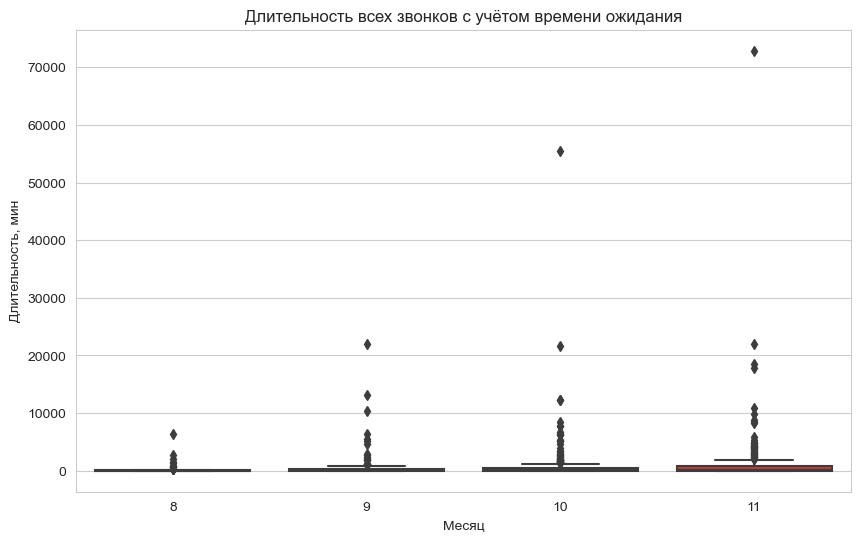

In [68]:
plt.subplots(figsize=(10, 6))
sns.boxplot(data=group_df, x="month", y="total_call_duration_m")
sns.set_style("whitegrid")
plt.title("Длительность всех звонков с учётом времени ожидания")
plt.xlabel("Месяц")
plt.ylabel("Длительность, мин")
plt.show()

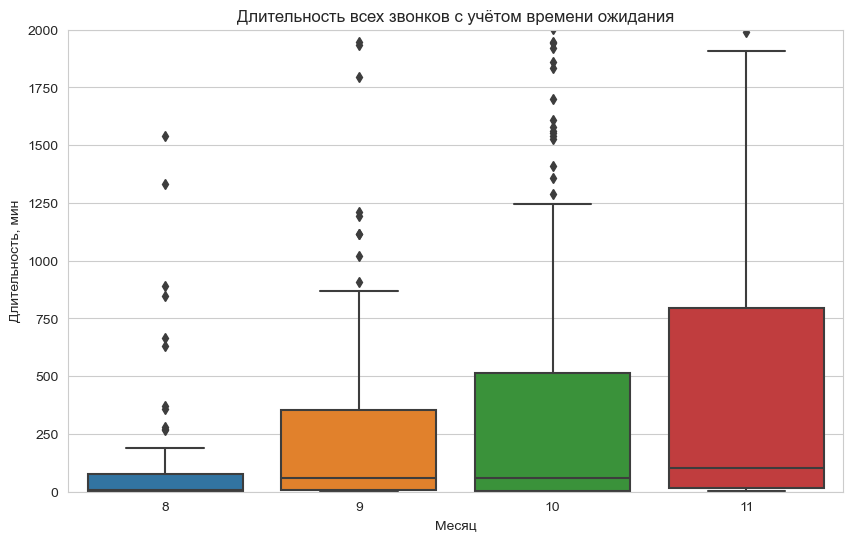

In [70]:
plt.subplots(figsize=(10, 6))
sns.boxplot(data=group_df, x="month", y="total_call_duration_m")

plt.title("Длительность всех звонков с учётом времени ожидания")
plt.xlabel("Месяц")
plt.ylabel("Длительность, мин")
plt.ylim(0, 2000)
plt.show()

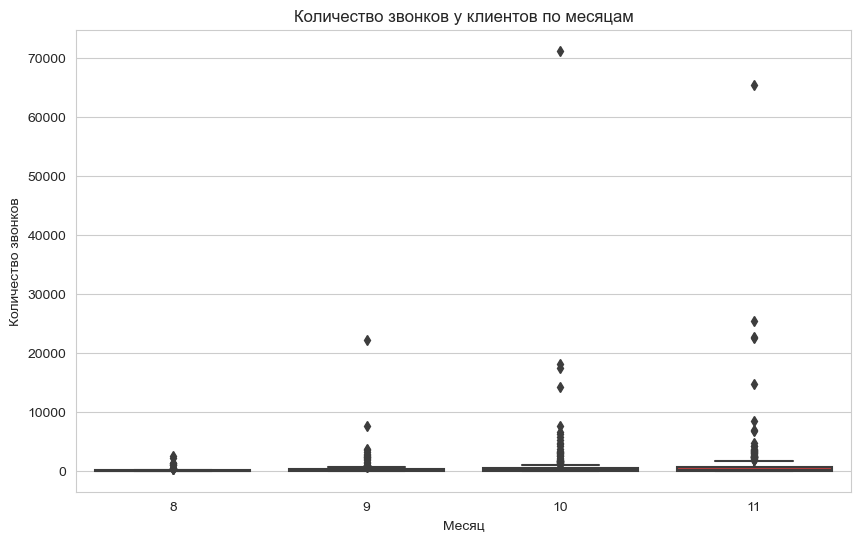

In [72]:
plt.subplots(figsize=(10, 6))
sns.boxplot(x="month", y="calls_count", data=group_df)
plt.title("Количество звонков у клиентов по месяцам")
plt.xlabel("Месяц")
plt.ylabel('Количество звонков')
plt.show()

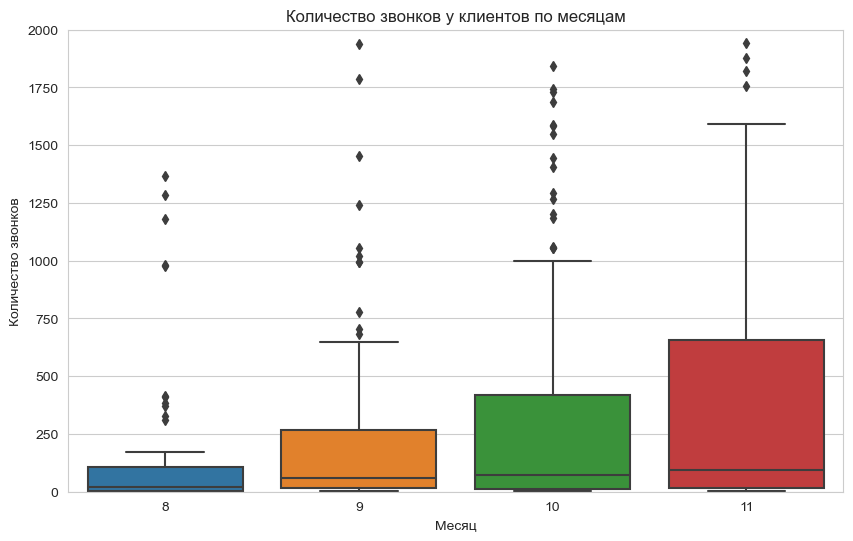

In [129]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="month", y="calls_count", data=group_df, ax=ax)
ax.set_title('Количество звонков у клиентов по месяцам')
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество звонков')
plt.ylim(0, 2000)
plt.show()

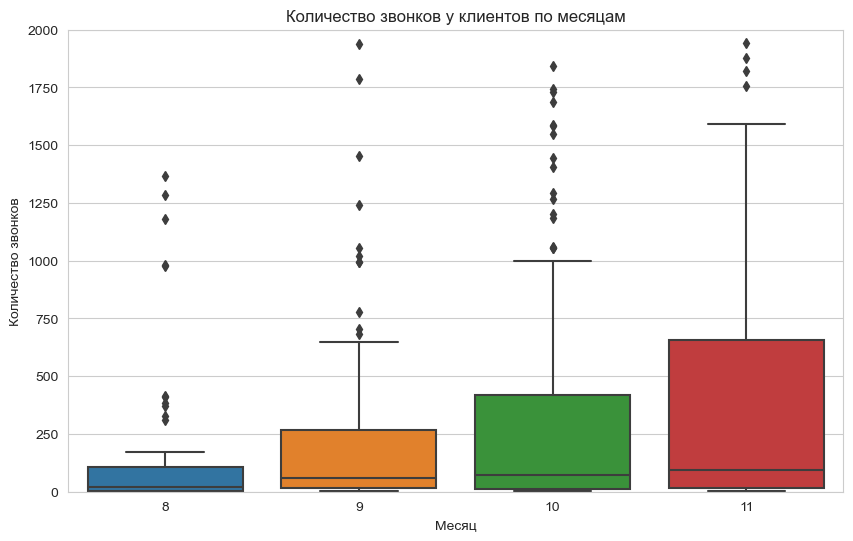

In [75]:
plt.subplots(figsize = (10, 6))
sns.set_style("whitegrid")
sns.boxplot(data = group_df, x="month", y="calls_count")
plt.title('Количество звонков у клиентов по месяцам')
plt.ylabel('Количество звонков')
plt.xlabel('Месяц')
plt.ylim(0, 2000)
plt.show()

Компании только начинают пользоваться услугами нашей компании. Поэтому с каждым месяцем увеличивается время разговоров операторов, а также количество звонков. Поэтому активными будем считать клиентов, которые пользуются количеством минут более, чем 50 перцентиль по каждому месяцу. Далее данный показатель, возможно, потребует доработки, т к будет больше данных о потребностях компаний. 

In [76]:
first_month = 9
second_month = 10 
third_month = 11

In [77]:
condition = []
for i in range(first_month, third_month+1):
    condition.append(group_df[group_df['month'] == i]['total_call_duration_m'].quantile(.50))
condition 

[60.0, 59.5, 102.5]

In [78]:
# формируем список id активных пользователей
active_user_id_1 = list(group_df[((group_df['total_call_duration_m'] >= condition[0]) 
                                  & (group_df['month'] == first_month))]['user_id'].unique())
active_user_id_2 = list(group_df[((group_df['total_call_duration_m'] >= condition[1]) 
                                  & (group_df['month'] == second_month))]['user_id'].unique())
active_user_id_3 = list(group_df[((group_df['total_call_duration_m'] >= condition[2]) 
                                  & (group_df['month'] == third_month))]['user_id'].unique())
active_user_id = list(set(active_user_id_1) & set(active_user_id_2) & set(active_user_id_3))
len(active_user_id)

57

In [79]:
#определяем пассивных пользователей
passive_user_id = list(set(user_id_all) - set(active_user_id))
len(passive_user_id)

249

### Проверка гипотезы "Активные клиенты говорят больше, чем неактивные".

Гипотеза 1

Н0 "Активные и неактивные пользователи говорят в среднем одинаково"

Н1 "Время разговора у активных пользователей отличается от времени разговора неактивных клиентов"

Подготовим данные по активным и неактивным пользователям. 
Т.к. t-тест сильно зависим от выбросов, то оставим данные по 95 процентилю.

In [80]:
upper_bound = group_df[group_df['user_id'].isin(active_user_id)]['total_call_duration'].quantile(q=0.975)
duration_active = group_df[(
    group_df['user_id'].isin(active_user_id) & (group_df['total_call_duration'] <=upper_bound))]['total_call_duration']
duration_active.mean()

68544.22959183673

In [81]:
upper_bound_p = group_df[group_df['user_id'].isin(passive_user_id)]['total_call_duration'].quantile(q=0.975)
duration_passive = group_df[
    (group_df['user_id'].isin(passive_user_id) & (group_df['total_call_duration'] <=upper_bound_p))]['total_call_duration']
duration_passive.mean()

16722.484265734267

In [82]:

alpha = 0.05 

# equal_var = False, n к у нас выборки разного размера
results = st.ttest_ind(duration_passive, duration_active, equal_var = False) 


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: 2.8205650014235025e-14
Отвергаем нулевую гипотезу


In [83]:
duration_active.mean()/duration_passive.mean()

4.0989262422144686

В результате проверки гипотезы мы обраружили, что статистическая значимость различий в среднем времени разговора по каждому клиенту между группами активных и пассивных есть. 
Таким образом, мы можем говорить о том, что выделение активынх клиентов было выполнено верно. Активные клиенты говорят почти в четыре раза больше, чем пассивные.

### Поиск активных клиентов, использующих неэффективный тариф.

Изначально объеденим клиентов и тарифы.

In [84]:
tarif_data = telecom_dataset.merge(telecom_clients, on='user_id', how = 'inner')
tarif_data.head(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,month,tariff_plan,date_start
0,166377,2019-08-04,in,False,0,True,2.0,0.0,4.0,8,B,2019-08-01
1,166377,2019-08-05,out,True,880022,True,3.0,0.0,5.0,8,B,2019-08-01
2,166377,2019-08-05,out,True,880020,True,1.0,0.0,1.0,8,B,2019-08-01
3,166377,2019-08-05,out,True,880020,False,1.0,10.0,18.0,8,B,2019-08-01
4,166377,2019-08-05,out,False,880022,True,3.0,0.0,25.0,8,B,2019-08-01
5,166377,2019-08-05,out,False,880020,False,2.0,3.0,29.0,8,B,2019-08-01
6,166377,2019-08-05,out,False,880020,True,8.0,0.0,50.0,8,B,2019-08-01
7,166377,2019-08-05,in,False,0,True,6.0,0.0,35.0,8,B,2019-08-01
8,166377,2019-08-06,in,False,0,True,4.0,0.0,62.0,8,B,2019-08-01
9,166377,2019-08-06,out,False,881278,True,3.0,0.0,29.0,8,B,2019-08-01


In [85]:
billing_data = tarif_data[['user_id', 'month', 'tariff_plan']]
billing_data = billing_data.drop_duplicates().reset_index(drop=True)
billing_data.tail()


,user_id,month,tariff_plan
783,168583,11,B
784,168598,11,C
785,168601,11,C
786,168603,11,B
787,168606,11,C


In [86]:
# добавляем количество операторов, убирая значение оператор 0
billing_data = billing_data.merge(tarif_data.query('operator_id != 0').pivot_table(index = ['user_id', 'month'],
                      values = ['operator_id'], 
                      aggfunc={"operator_id": 'nunique'}).reset_index(), on=['user_id', 'month'], how = 'outer')
billing_data = billing_data.rename(columns = {'operator_id':'operator_count'})
billing_data.head()

,user_id,month,tariff_plan,operator_count
0,166377,8,B,5.0
1,166377,9,B,4.0
2,166377,10,B,5.0
3,166377,11,B,4.0
4,166391,8,C,2.0


In [87]:
# считаем длительность всех входящтих вызовов, не выделяя внутренние и внешние
in_call = tarif_data.query('direction == "in"').pivot_table(
    index = ['user_id', 'date', 'month', 'operator_id'],
                      values = ['call_duration'], 
                      aggfunc={"call_duration": 'sum'}).reset_index()
in_call['call_duration'] = in_call['call_duration'].map(lambda x: np.ceil(x/60))
in_call = in_call.rename(columns = {'call_duration':'in_call_m'})


in_call = in_call.pivot_table(index = ['user_id', 'month'],
                      values = ['in_call_m'], 
                      aggfunc={"in_call_m": 'sum'}).reset_index()
in_call

,user_id,month,in_call_m
0,166377,8,27.0
1,166377,9,36.0
2,166377,10,45.0
3,166377,11,55.0
4,166391,8,5.0
...,...,...,...
774,168583,11,20.0
775,168598,11,76.0
776,168601,11,147.0
777,168603,11,0.0


In [88]:
out_internal_call = tarif_data.query('direction == "out" and internal == True').pivot_table(
    index = ['user_id', 'date', 'month', 'operator_id'],
                      values = ['total_call_duration'], 
                      aggfunc={"total_call_duration": 'sum'}).reset_index()
out_internal_call['total_call_duration'] = out_internal_call['total_call_duration'].map(lambda x: np.ceil(x/60))
out_internal_call = out_internal_call.rename(columns = {'total_call_duration':'out_internal_call_m'})


out_internal_call = out_internal_call.pivot_table(index = ['user_id', 'month'],
                      values = ['out_internal_call_m'], 
                      aggfunc={"out_internal_call_m": 'sum'}).reset_index()

out_internal_call.head()

,user_id,month,out_internal_call_m
0,166377,8,7.0
1,166377,9,5.0
2,166377,10,2.0
3,166377,11,4.0
4,166391,8,1.0


In [89]:
# считаем количество минут для каждого оператора
out_no_internal_call = tarif_data.query('direction == "out" and internal == False').pivot_table(
    index = ['user_id', 'date', 'month', 'operator_id'],
                      values = ['total_call_duration'], 
                      aggfunc={"total_call_duration": 'sum'}).reset_index()
out_no_internal_call['total_call_duration'] = out_no_internal_call['total_call_duration'].map(lambda x: np.ceil(x/60))
out_no_internal_call = out_no_internal_call.rename(columns = {'total_call_duration':'out_no_internal_call_m'})
# производим группировку по клиентам
out_no_internal_call = out_no_internal_call.pivot_table(index = ['user_id', 'month'],
                      values = ['out_no_internal_call_m'], 
                      aggfunc={"out_no_internal_call_m": 'sum'}).reset_index()
out_no_internal_call.head()

,user_id,month,out_no_internal_call_m
0,166377,8,1322.0
1,166377,9,1792.0
2,166377,10,1679.0
3,166377,11,1614.0
4,166405,8,859.0


In [90]:
billing_data.head()

,user_id,month,tariff_plan,operator_count
0,166377,8,B,5.0
1,166377,9,B,4.0
2,166377,10,B,5.0
3,166377,11,B,4.0
4,166391,8,C,2.0


In [91]:
# получили итоговую таблицу с минутами
billing_data = billing_data.merge(out_no_internal_call, on=['user_id', 'month'], how = 'outer')
billing_data = billing_data.merge(out_internal_call, on=['user_id', 'month'], how = 'outer')
billing_data = billing_data.merge(in_call, on=['user_id', 'month'], how = 'outer')
billing_data = billing_data.fillna(0)
billing_data.head()

,user_id,month,tariff_plan,operator_count,out_no_internal_call_m,out_internal_call_m,in_call_m
0,166377,8,B,5.0,1322.0,7.0,27.0
1,166377,9,B,4.0,1792.0,5.0,36.0
2,166377,10,B,5.0,1679.0,2.0,45.0
3,166377,11,B,4.0,1614.0,4.0,55.0
4,166391,8,C,2.0,0.0,1.0,5.0


In [92]:
tariffs = pd.DataFrame({
    'tariff_name':['A', 'B', 'C'],
    'month_fee':[4000, 2000, 1000],
    'inside_calls':[0.1, 0.15, 0.3],
    'outside_calls':[0.3, 0.5, 0.7],
    'operator':[50, 150, 300],
    'internal_call_limit':[2000, 500, 0]
})
tariffs

,tariff_name,month_fee,inside_calls,outside_calls,operator,internal_call_limit
0,A,4000,0.10,0.3,50,2000
1,B,2000,0.15,0.5,150,500
2,C,1000,0.30,0.7,300,0


In [93]:
# Проведем расчеты затрат по всем тарифам:

def monthly_revenue_best(row):
    
    # Добавление ежемесячной абонентской платы по всем тарифам:
    result = []
    for i in list(tariffs['tariff_name'].unique()):
        tariff_name = str(i)
        
        # расчет операторов:
        total = row['operator_count'] * int(tariffs[tariffs['tariff_name'] == tariff_name]['operator'])
        
        # добавление ежемесячной платы:
        total += int(tariffs[tariffs['tariff_name'] == tariff_name]['month_fee'])
        
        # добавление платы за исходящие внешние:                 
        total += row['out_no_internal_call_m'] * float(tariffs[tariffs['tariff_name'] == tariff_name]['outside_calls'])
                 
        # добавление платы за исходящие внутренние:            
        if row['out_internal_call_m'] > float(tariffs[tariffs['tariff_name'] == tariff_name]['internal_call_limit']):
            total += (row['out_internal_call_m'] - float(tariffs[tariffs['tariff_name'] == tariff_name]['internal_call_limit'])) \
                         * float(tariffs[tariffs['tariff_name'] == tariff_name]['inside_calls'])
        
        result += [[tariff_name, total]]
        
    # на основе расчетов выше созодадим датафрейм с тарифами:                             
    tariff_costs = pd.DataFrame(result, columns = ['tariff_name', 'cost'])
                     
    # выбираем оптимальный тариф:   
    best_tariff_name = tariff_costs.nsmallest(1, 'cost')['tariff_name'].values[0]
    best_cost = tariff_costs.nsmallest(1, 'cost')['cost'].values[0]
            
    # определим затраты по действующему тарифу:   
    current_cost = tariff_costs[tariff_costs['tariff_name'] == row['tariff_plan']]['cost'].values[0]
    
    
            
    # добавляем столбцы в исходный датафрейм:                    
    row['pay'] = current_cost          
    row['after_optimisation'] = best_cost
    row['optimal_tariff'] = best_tariff_name
    
    # определяем нужно ли менять тариф 
    if row['tariff_plan'] == row['optimal_tariff']:
        val = False
    else :
         val = True
    row['change'] = val
    
    
    return row    
                         
billing_data = billing_data.apply(monthly_revenue_best, axis = 1)

In [94]:
billing_data.head()

,user_id,month,tariff_plan,operator_count,out_no_internal_call_m,out_internal_call_m,in_call_m,pay,after_optimisation,optimal_tariff,change
0,166377,8,B,5.0,1322.0,7.0,27.0,3411.0,3411.0,B,False
1,166377,9,B,4.0,1792.0,5.0,36.0,3496.0,3455.9,C,True
2,166377,10,B,5.0,1679.0,2.0,45.0,3589.5,3589.5,B,False
3,166377,11,B,4.0,1614.0,4.0,55.0,3407.0,3331.0,C,True
4,166391,8,C,2.0,0.0,1.0,5.0,1600.3,1600.3,C,False


In [95]:
optimisation = billing_data.query('month !=8').pivot_table(
    index = ['user_id'], values = ['pay', 'after_optimisation', 'change', 'optimal_tariff'], 
    aggfunc={"pay": 'sum',
            "after_optimisation": 'sum',
            'change': 'sum',
            'optimal_tariff': 'nunique'}).reset_index()
optimisation.head()

,user_id,after_optimisation,change,optimal_tariff,pay
0,166377,10376.4,2,2,10492.5
1,166391,3600.0,0,1,3600.0
2,166392,4800.0,0,1,4800.0
3,166399,2600.0,0,1,2600.0
4,166405,16477.5,2,2,16913.5


In [96]:
# список пользователей, которые нужно предложить сменить тариф? как активных, так и пассивных
optim = list(optimisation.query('change == 3 and optimal_tariff ==1')['user_id'])
optim

[166406,
 166407,
 166428,
 166495,
 166503,
 166520,
 166533,
 166536,
 166541,
 166548,
 166609,
 166658,
 166660,
 166678,
 166697,
 166711,
 166713,
 166725,
 166732,
 166774,
 166800,
 166813,
 166839,
 166843,
 166879,
 166884,
 166896,
 166899,
 166916,
 166971,
 166975,
 166983,
 167002,
 167004,
 167061,
 167071,
 167077,
 167078,
 167082,
 167109,
 167110,
 167150,
 167158,
 167172,
 167175,
 167185,
 167250,
 167263,
 167264,
 167265,
 167275,
 167338,
 167402,
 167436,
 167451,
 167475,
 167479,
 167487,
 167543,
 167621,
 167634,
 167654,
 167716]

In [97]:
# список активных клиентов, которым нужно предложить изменить тариф
optim_active = list(set(optim) & set(active_user_id))
len(optim_active)

26

In [98]:
optim_active

[166658,
 166916,
 167172,
 166406,
 166407,
 166536,
 167175,
 166541,
 166800,
 166678,
 167071,
 167082,
 167479,
 167487,
 167109,
 166725,
 166983,
 167004,
 166495,
 167264,
 166879,
 166503,
 167150,
 166896,
 166899,
 166520]

### Расчет текущей выручки и выручки после оптимизации тарифов.

In [99]:
billing_data.loc[~billing_data['user_id'].isin(optim_active),  'after_optimisation'] = billing_data['pay']
billing_data.loc[~billing_data['user_id'].isin(optim_active),  'optimal_tariff'] = billing_data['tariff_plan']
billing_data.loc[~billing_data['user_id'].isin(active_user_id),  'status'] = 'пассивный'
billing_data.loc[billing_data['user_id'].isin(active_user_id),  'status'] = 'активный'
billing_data.head()

,user_id,month,tariff_plan,operator_count,out_no_internal_call_m,out_internal_call_m,in_call_m,pay,after_optimisation,optimal_tariff,change,status
0,166377,8,B,5.0,1322.0,7.0,27.0,3411.0,3411.0,B,False,активный
1,166377,9,B,4.0,1792.0,5.0,36.0,3496.0,3496.0,B,True,активный
2,166377,10,B,5.0,1679.0,2.0,45.0,3589.5,3589.5,B,False,активный
3,166377,11,B,4.0,1614.0,4.0,55.0,3407.0,3407.0,B,True,активный
4,166391,8,C,2.0,0.0,1.0,5.0,1600.3,1600.3,C,False,пассивный


In [100]:
income_before_optimisation = billing_data.loc[((billing_data['month'] == first_month) 
| (billing_data['month'] == second_month) 
| (billing_data['month'] == third_month)), 'pay' ]

income_after_optimisation = billing_data.loc[((billing_data['month'] == first_month) 
| (billing_data['month'] == second_month) 
| (billing_data['month'] == third_month)), 'after_optimisation' ]


In [101]:
print(f'''Для исследования был выбран период с {first_month} по {third_month} месяц. 
Выручка до оптимизации тарифов за данный период составила : {income_before_optimisation.sum()}
Выручка после оптимизации тарифов за данный период составила: {income_after_optimisation.sum()}
Сокращение выручки составило: {round(income_before_optimisation.sum() - income_after_optimisation.sum(), 2)} рублей или {
round(((income_before_optimisation.sum() - income_after_optimisation.sum())/income_before_optimisation.sum())*100, 2)}% ''') 

Для исследования был выбран период с 9 по 11 месяц. 
Выручка до оптимизации тарифов за данный период составила : 1788925.4499999997
Выручка после оптимизации тарифов за данный период составила: 1722596.75
Сокращение выручки составило: 66328.7 рублей или 3.71% 


### Проверка гипотезы "Средние затраты киентов не изменились после оптимизации".

Н0 "Средние затраты активного пользователя на услуги компании до и после оптимизации не отличаются"

Н1 "Средние затраты активного пользователя на услуги компании после оптимизации уменьшились"

In [102]:
alpha = 0.05  

results = st.mannwhitneyu(list(income_before_optimisation),  list(income_after_optimisation),  True, 'greater')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 


p-значение:  0.0807109922236971
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Cтатистическая значимость различий в средних затратах клиентов до и после оптимизации не обнаружена.
Изменение тарифа у 26 активных клиента на оптимальный не значительно оказало влияние на выручку.

### Оценка деятельности компании

**ARPU** (средняя выручка (за месяц) в расчёте на одного клиента)

In [103]:
arpu = billing_data.pivot_table(index= 'month', values = ['pay', 'user_id' ] , aggfunc = ({'user_id': "nunique",'pay': 'sum' }))
arpu['arpu'] = round(arpu['pay']/arpu['user_id'], 2)
arpu

,pay,user_id,arpu
month,,,
8,187539.60,84,2232.61
9,422674.70,172,2457.41
10,681319.10,272,2504.85
11,684931.65,260,2634.35


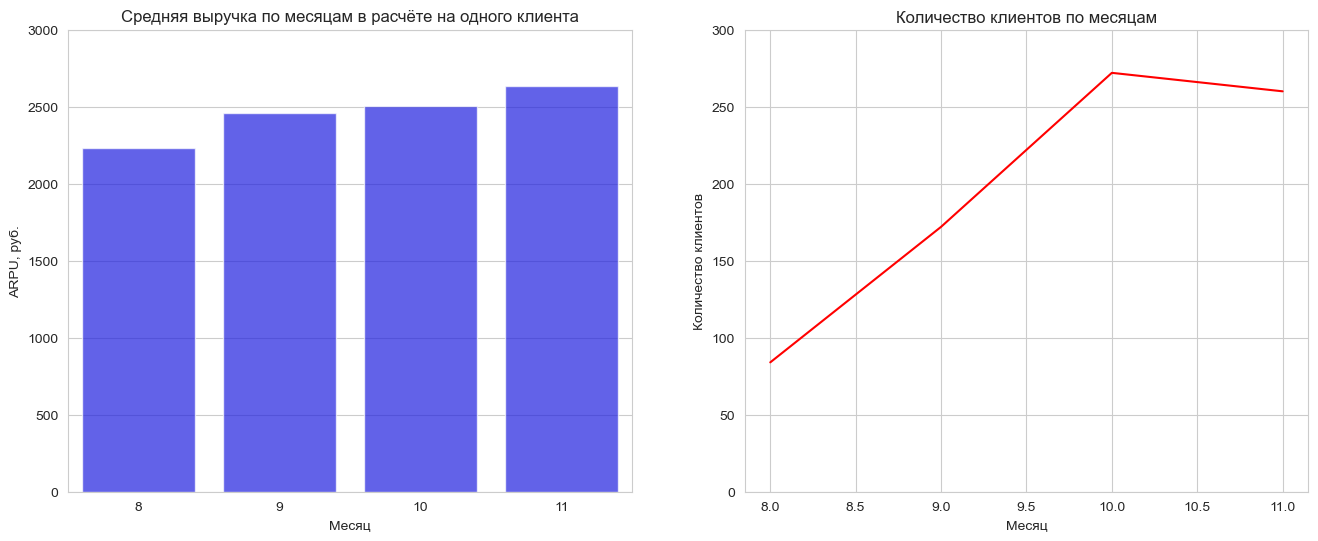

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")
sns.barplot(x=month, y=arpu['arpu'].values, color='blue', alpha=0.7, ax=ax1)
ax1.set_ylabel('ARPU, руб.')
ax1.set_ylim([0, 3000])
ax1.set_title('Средняя выручка по месяцам в расчёте на одного клиента')
ax1.set_xlabel('Месяц')

sns.lineplot(x=month, y=arpu['user_id'].values, color='red', ax=ax2)
ax2.set_ylabel('Количество клиентов')
ax2.set_ylim([0, 300])
ax2.set_title('Количество клиентов по месяцам')
ax2.set_xlabel('Месяц')

plt.show()

**ARPM** (Average Revenue Per Minute) – средняя выручка на одну минуту разговора

In [106]:
billing_data

,user_id,month,tariff_plan,operator_count,out_no_internal_call_m,out_internal_call_m,in_call_m,pay,after_optimisation,optimal_tariff,change,status
0,166377,8,B,5.0,1322.0,7.0,27.0,3411.0,3411.0,B,False,активный
1,166377,9,B,4.0,1792.0,5.0,36.0,3496.0,3496.0,B,True,активный
2,166377,10,B,5.0,1679.0,2.0,45.0,3589.5,3589.5,B,False,активный
3,166377,11,B,4.0,1614.0,4.0,55.0,3407.0,3407.0,B,True,активный
4,166391,8,C,2.0,0.0,1.0,5.0,1600.3,1600.3,C,False,пассивный
...,...,...,...,...,...,...,...,...,...,...,...,...
783,168583,11,B,2.0,0.0,0.0,20.0,2300.0,2300.0,B,True,пассивный
784,168598,11,C,1.0,0.0,0.0,76.0,1300.0,1300.0,C,False,пассивный
785,168601,11,C,2.0,564.0,0.0,147.0,1994.8,1994.8,C,False,пассивный
786,168603,11,B,1.0,22.0,0.0,0.0,2161.0,2161.0,B,True,пассивный


In [107]:
ARPM = billing_data.pivot_table(index= 'month', 
                                values = ['pay', 'in_call_m', 'out_no_internal_call_m', 'out_internal_call_m'] , 
                                aggfunc =  'sum')
ARPM['total_m'] = ARPM['in_call_m']+ARPM['out_no_internal_call_m']+ARPM['out_internal_call_m']

ARPM['ARPM'] = round(ARPM['pay']/(ARPM['total_m']), 2)

ARPM

,in_call_m,out_internal_call_m,out_no_internal_call_m,pay,total_m,ARPM
month,,,,,,
8,3260.0,108.0,16751.0,187539.60,20119.0,9.32
9,20087.0,1745.0,87368.0,422674.70,109200.0,3.87
10,54267.0,3578.0,201248.0,681319.10,259093.0,2.63
11,84056.0,6977.0,233721.0,684931.65,324754.0,2.11


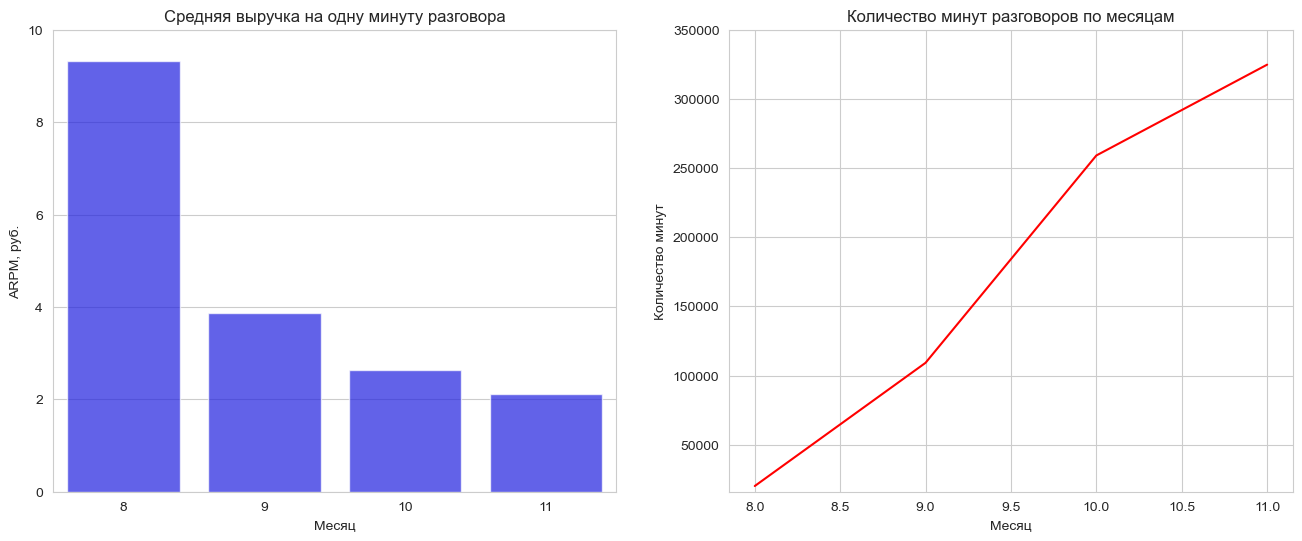

In [108]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("whitegrid")
sns.barplot(x=ARPM.index, y=ARPM['ARPM'].values, color='blue', alpha=0.7, ax=ax1)
ax1.set_ylabel('ARPM, руб.')
ax1.set_ylim([0, 10])
ax1.set_title('Средняя выручка на одну минуту разговора')
ax1.set_xlabel('Месяц')

sns.lineplot(x=ARPM.index, y=ARPM['total_m'], color='red', ax=ax2)
ax2.set_ylabel('Количество минут')
ax2.set_ylim([16000, 350000])
ax2.set_title('Количество минут разговоров по месяцам')
ax2.set_xlabel('Месяц')
plt.show()

### Изучение потребительского поведения неактивных и активных клиентов.

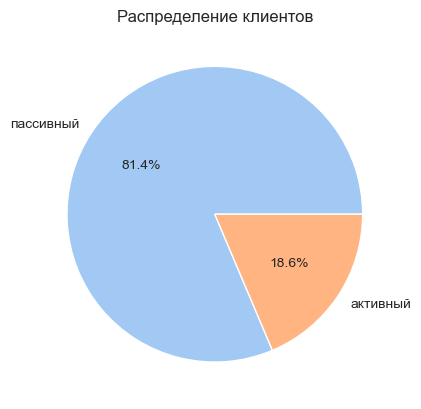

In [110]:
colors = sns.color_palette('pastel')[ 0:2 ]
plt.pie(billing_data[['user_id', 'status']].drop_duplicates().status.value_counts(), 
        labels=billing_data[['user_id', 'status']].drop_duplicates().status.value_counts().index, 
        autopct='%1.1f%%',
       colors= colors)
plt.title('Распределение клиентов');

In [113]:
pivot_out_no_internal = billing_data.pivot_table(
    index= ['tariff_plan', 'status', 'month'], values ='out_no_internal_call_m', aggfunc='sum' ).reset_index()
pivot_out_no_internal

,tariff_plan,status,month,out_no_internal_call_m
0,A,активный,8,51.0
1,A,активный,9,479.0
2,A,активный,10,2483.0
3,A,активный,11,2425.0
4,A,пассивный,8,169.0
5,A,пассивный,9,21442.0
6,A,пассивный,10,88628.0
7,A,пассивный,11,117787.0
8,B,активный,8,12454.0
9,B,активный,9,24145.0


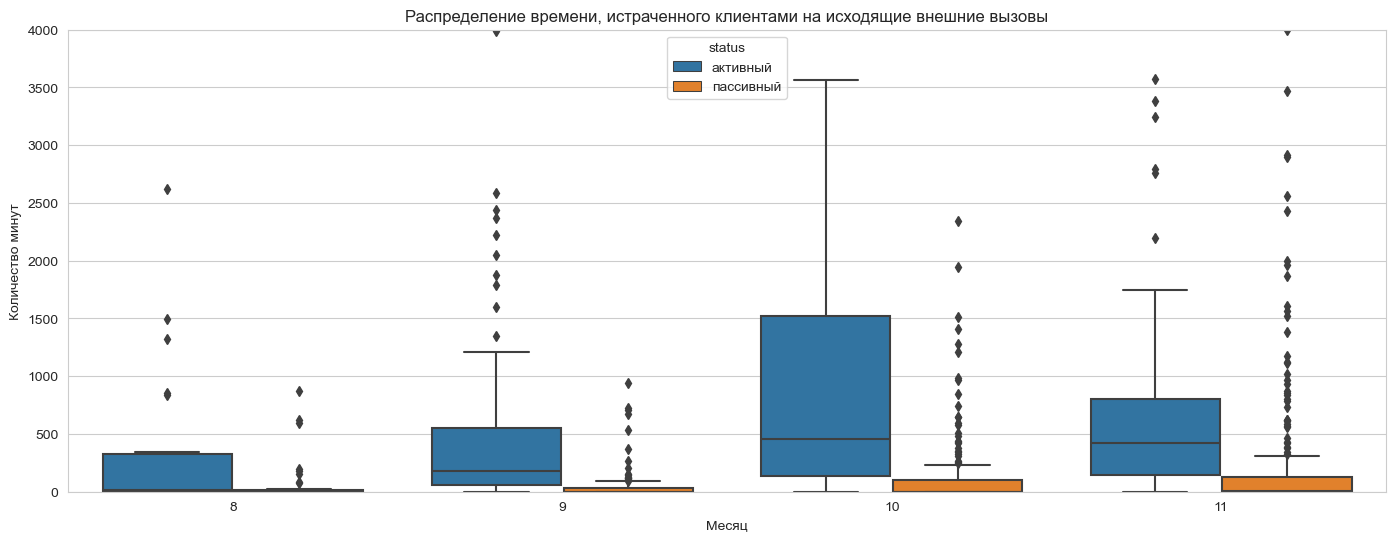

In [114]:
#посмотрим в разрезе тарифов распределение времени
fig, ax = plt.subplots(1, 1, figsize=(17, 6))
sns.boxplot(data=billing_data.sort_values(by = ['month','tariff_plan']), 
            x="month", y="out_no_internal_call_m", hue="status" )

plt.title('Распределение времени, истраченного клиентами на исходящие внешние вызовы')
plt.ylabel('Количество минут')
plt.xlabel('Месяц')
ax.set_ylim([0, 4000])
plt.show()

Активные пользователи значительно больше тратят времени на исходящие внешние вызовы в сентябре и октябре. Пассивные пользователи активизировались в ноябре.

In [116]:
pivot_out_internal = billing_data.pivot_table(
    index= ['tariff_plan', 'status', 'month'], values ='out_internal_call_m', aggfunc='mean' ).reset_index()

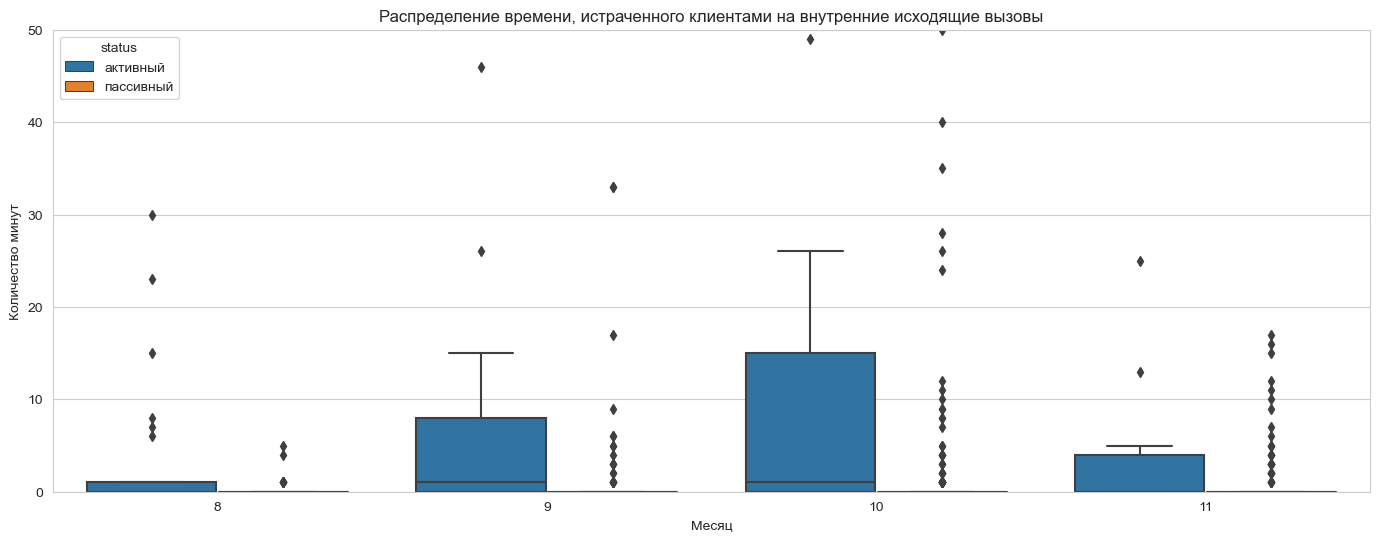

In [117]:
#посмотрим в разрезе тарифов распределение времени
fig, ax = plt.subplots(1, 1, figsize=(17, 6))
sns.boxplot(data=billing_data.sort_values(by = ['month','tariff_plan']), 
            x="month", y="out_internal_call_m", hue="status" )

plt.title('Распределение времени, истраченного клиентами на внутренние исходящие вызовы')
plt.ylabel('Количество минут')
plt.xlabel('Месяц')
ax.set_ylim([0, 50])
plt.show()

Пассивые пользователи почти не совершают внутренних исходящих вызовов. Также наблюдается повышение активности в ноябре у пассивных пользователей.

In [119]:
pivot_in = billing_data.pivot_table(
    index= ['tariff_plan', 'status', 'month'], values ='in_call_m', aggfunc='mean' ).reset_index()
pivot_in.head()

,tariff_plan,status,month,in_call_m
0,A,активный,8,8.500000
1,A,активный,9,234.428571
2,A,активный,10,667.571429
3,A,активный,11,515.571429
4,A,пассивный,8,14.250000


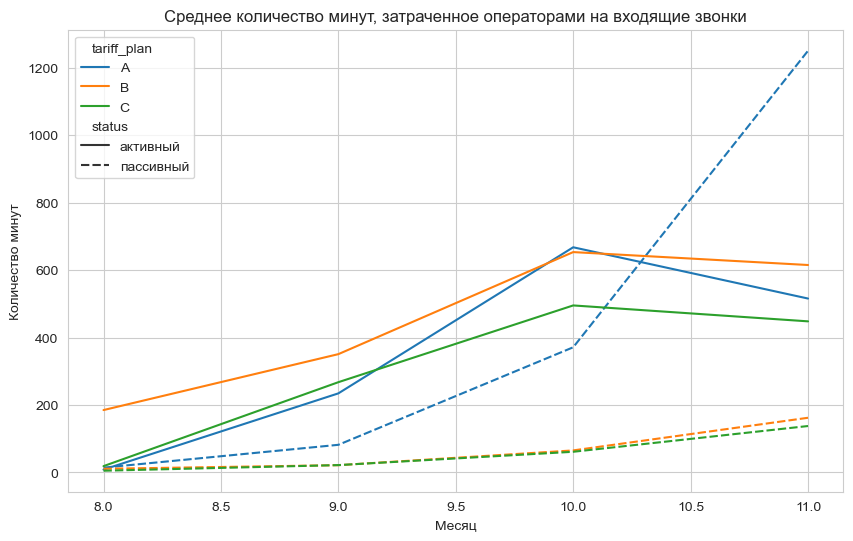

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.lineplot(data=pivot_in, 
            x="month", y="in_call_m", hue="tariff_plan", style='status' )

plt.title('Среднее количество минут, затраченное операторами на входящие звонки')
plt.ylabel('Количество минут')
plt.xlabel('Месяц')

plt.show()

In [122]:
pivot_11 = billing_data.query('month ==11').pivot_table(
    index= ['tariff_plan', 'status'], values ='pay', aggfunc='mean' ).reset_index()
pivot_11

,tariff_plan,status,pay
0,A,активный,4368.214286
1,A,пассивный,6017.550000
2,B,активный,3432.673913
3,B,пассивный,2518.036301
4,C,активный,2440.674074
5,C,пассивный,1789.830556


Заказчик запросил тенденцию по выручке с пользователей в ноябре.
Самыми привлекательными с точки зрения выручки явялются активные пользователи использующие тариф C.
При этом пассивные пользователи использующие тариф А приносят больше всего выручки.

In [124]:
pivot_11_opt = billing_data.query('month ==11').pivot_table(
    index= ['optimal_tariff', 'status'], values ='after_optimisation', aggfunc='mean' ).reset_index()
pivot_11_opt

,optimal_tariff,status,after_optimisation
0,A,активный,5936.800000
1,A,пассивный,6017.550000
2,B,активный,4238.838462
3,B,пассивный,2518.036301
4,C,активный,2050.711905
5,C,пассивный,1789.830556


При условии внедрения оптимизации в ноябре значитально увеличивается средний чек для активных клиентов в Тарифе А.

## Выводы 

### Общие выводы

**О компании:**  Клиентами «Нупозвони» являются организации, которым нужно распределять множество входящих вызовов на различных операторов, либо осуществлять исходящие вызовы силами операторов. Также операторы могут осуществлять внутренние вызовы, то есть вызовы друг между другом, которые осуществляются внутри сети виртуальной телефонии.

**Заказчик:** гениральный деректор «Нупозвони»

**Первоначальный запрос:** поиск клиентов, которые переплачивают, анализ влияния изменений на выручку.
    
**Цель проекта:** выявление активных клиентов за последние 3 месяца, использующих неэффективный тариф с целью сохранения лояльности клиента, и провести анализ изменения выручки компании при пререводе клиентов на оптимальные тарифы.

Для достижения поставленной цели требуется выполнение следующих **задач**: 
* определние критерия активности клиента
* расчет всех возможных вариантов по каждому тарифу по всем клиентам
* расчет текущей выручки и предполагаемая выручка после внесения изменений

Анализ проводится 3 раз в месяца. 
Рассматриваемый период сентябрь - ноябрь (ноябрь считаем полным месяцем)

**Всего**: 306 клиентов

**Активных** : 57 (18, 6%)

**Пассивных**: 249(81.4%)

Активными клиентами считаются те, кто за месяц выговаривал больше, чем 50% пользователей. Активным будет считаться клиент, который перешел границу 50 перцентиля в каждый месяц рассматриваемого периода. 



В результате проведенного анализа составлен список активных клиентов неоптимально использующих свой тариф. 
Среди всех активных клиентов(57) 26-ти требуется предожить заменить тариф. Данные клиенты составляют 46% от всех активных клиентов и 8% от всех клиентов.


* Выручка до оптимизации тарифов за данный период составила : 1788925.45
* Выручка после оптимизации тарифов за данный период составила: 1722596.75
* Сокращение выручки составило: 66328.7 рублей или 3.71% 

**Спикок активных клиентов**, которым требуется предложить оптимизацию тарифов:

user_id: 166658, 166916, 167172, 166406, 166407, 166536, 167175, 166541, 166800, 166678, 167071, 167082, 167479, 167487, 167109, 166725, 166983, 167004, 166495, 167264, 166879, 166503, 167150, 166896, 166899, 166520

В рамках исследования были проверены 2 гипотезы

**Гипотеза 1**

Н0 "Активные и неактивные пользователи говорят в среднем одинаково"

Н1 "Время разговора у активных пользователей в среднем больше, чем у неактивных"

По результатам проверки онаружено, что статистически значимые различия есть и активные пользователи говорят почти в 4 раза больше. 
    
**Гипотеза 2**

Н0 "Средние затраты активного пользователя на услуги компании до и после оптимизации не отличаются"
Н1 "Средние затраты активного пользователя на услуги компании после оптимизации уменьшились"

Cтатистическая значимость различий в средних затратах клиентов до и после оптимизации не обнаружена. Изменение тарифов не повлекло за собой сильного изменения среднего чека. 

### Рекомендации 

В ходе анализа были выявлены 16 клиентов, у которых звонки не доходят до оператора. Они составляют 5% от общего числа клиентов. Требуется убедиться, что данное явление не является неисправностью с нашей стороны. 

user_id: 167265, 168578, 167939, 167077, 167721, 168490, 167114, 168329, 168013, 167981, 166584, 167631, 167768, 168340, 168024, 168446

Компания активно наращивает свою клиентскую базу. С августа по ноябрь число клиентов увеличилось с 84 до 260. Однако наблюдается уход клиентов по сравнению с октябрём месяцем. Требуется получить обратную связь от клиентов, которые ушли в ноябре и сделать им оффер, который позволит удержать клиента. 

Несмотря на уход клиентов по показателю ARPU наблюдается положительная динамика.
Требуется работа с показателем ARPM. Наблюдается сильный рост количества выговариваемых минут клиентами, но при этом значительно падает стоимость одной минуты для компании "Ну позвони".
Требуется вовлечение пассивных клиентов и после этого уточнения понятий "активный клиент" и "пассивный клиент"

### Ссылка на презентацию
https://disk.yandex.ru/d/nF6EmGpYZiDK_w

### Ссылка на дашборд

https://public.tableau.com/views/_16864799440990/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link